<a href="https://colab.research.google.com/github/andres-merino/MatematicasDiscretas-Virtual-05-N0279/blob/main/pages/clases/clase13/AnalisisAlgoritmos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Catálogo STEM</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Análisis de algoritmos
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; Septiembre 2025
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Análisis de algoritmos</font>
---

En esta sesión veremos cómo medir el tiempo de ejecución de un algoritmo y cómo interpretar los resultados. 
Usaremos ejemplos simples y gráficos para que el comportamiento temporal quede claro.

In [1]:
# Importamos time para medir intervalos temporales (en segundos).
from time import time

La función `time()` devuelve el tiempo en segundos desde el 1 de enero de 1970; la usamos aquí para medir diferencias (intervalos).
Para mediciones cortas y más precisas en entornos reales se recomienda `time.perf_counter()`, pero `time()` es suficiente para entender la idea.

In [2]:
# Ejemplo: mostrar el valor actual de time()
print('time() devuelve (ejemplo):', time())

time() devuelve (ejemplo): 1756846753.962372


Si llamamos a `time()` antes y después de ejecutar un algoritmo, la diferencia entre ambos valores nos da el tiempo que tardó en ejecutarse (en segundos).
Esta técnica nos permite medir empíricamente la velocidad y comparar implementaciones.

Consideremos el problema de sumar los primeros $n$ números naturales. Una implementación directa es la siguiente (bucle):

In [3]:
def suma(n):
    # Inicializamos el acumulador en 0 y sumamos uno a uno
    s = 0
    for i in range(1, n+1):
        s = s + i  # acumulamos i en s
    return s

# Probamos la función con un valor pequeño para verificar que funciona
print('suma(10) =', suma(10))

suma(10) = 55


In [4]:
# Medimos el tiempo de ejecución para un n relativamente grande
t_inicial = time()
print('suma(100000) =', suma(100000))  # comprobación del resultado
t_final = time()

# Mostramos el tiempo con formato (en segundos, 6 decimales)
print(f'El tiempo total fue: {t_final - t_inicial:.6f} segundos')

suma(100000) = 5000050000
El tiempo total fue: 0.003000 segundos


Para observar cómo crece el tiempo en función de $n$ hacemos varias mediciones para diferentes valores de $n$ y guardamos los resultados en una lista.
Es importante entender que estas mediciones son indicativas: el sistema puede introducir ruido (otras tareas, variabilidad).

In [5]:
# Tomamos una lista vacía para guardar los tiempos
tiempos = []
# Definimos una lista de valores de n (desde 100000 hasta 2000000, con paso de 100000)
n_vals = range(100000, 2000000, 100000)
# Iteramos sobre cada valor de n
for n in n_vals:
    t_inicial = time()
    suma(n)  # ejecutamos el algoritmo que queremos medir
    t_final = time()
    # Guardamos el tiempo medido
    tiempos.append(t_final - t_inicial)

# Mostramos los primeros valores medidos como comprobación
print(list(zip(n_vals[:5], tiempos[:5])))


[(100000, 0.002498149871826172), (200000, 0.005501270294189453), (300000, 0.00799870491027832), (400000, 0.009999513626098633), (500000, 0.013000249862670898)]


Ahora generamos un gráfico con `matplotlib` para visualizar la relación entre $n$ y el tiempo de ejecución.

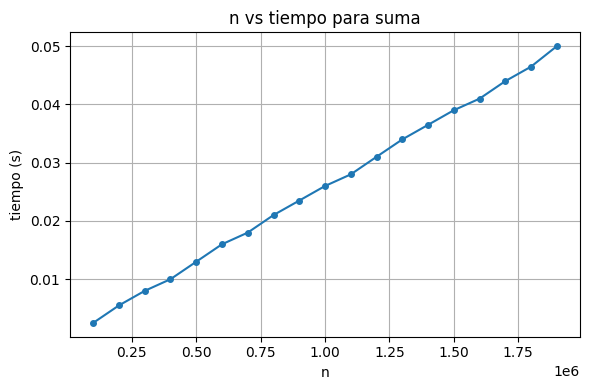

In [6]:
import matplotlib.pyplot as plt

# Gráfico simple con puntos conectados; añadimos cuadrícula y tamaño de figura para mayor claridad
plt.figure(figsize=(6,4))
plt.plot(n_vals, tiempos, 'o-', markersize=4)
plt.xlabel('n')
plt.ylabel('tiempo (s)')
plt.title('n vs tiempo para suma')
plt.grid(True)
plt.tight_layout()
plt.show()

Podemos aumentar el número de puntos para ver el comportamiento con más detalle. Esto puede tardar más en ejecutarse porque repetimos la suma muchas veces.

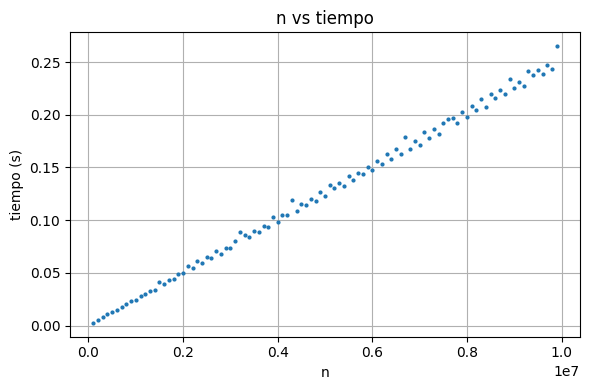

In [7]:
# Este bloque genera más puntos; cuidado con el tiempo que tarda en ejecutarse en la máquina local.
tiempos = []
n_vals = range(100000, 10000000, 100000)
for n in n_vals:
    t_inicial = time()
    suma(n)
    t_final = time()
    tiempos.append(t_final - t_inicial)

plt.figure(figsize=(6,4))
plt.plot(n_vals, tiempos, 'o', markersize=2)
plt.xlabel('n')
plt.ylabel('tiempo (s)')
plt.title('n vs tiempo')
plt.grid(True)
plt.tight_layout()
plt.show()

Los puntos parecen seguir una tendencia aproximadamente lineal. Ahora compararemos con una fórmula matemática que calcula la suma en tiempo constante (sin bucle):

In [8]:
def suma_mejorada(n):
    # Fórmula conocida: suma de 1..n = n*(n+1)/2
    s = n * (n + 1) / 2
    return s

# Verificamos con un ejemplo
print('suma_mejorada(10) =', suma_mejorada(10))

suma_mejorada(10) = 55.0


Medimos ahora el tiempo de esta implementación (constante en el número de operaciones) y lo graficamos para comparar.

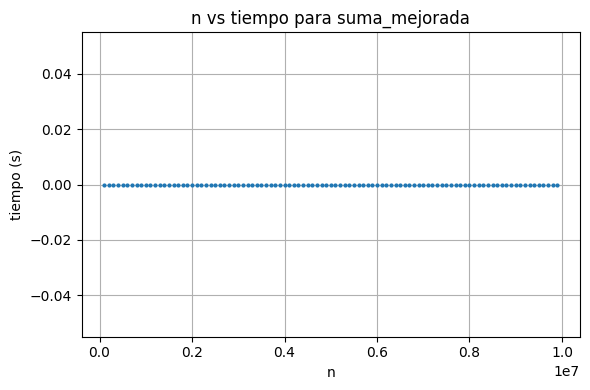

In [9]:
tiempos = []
n_vals = range(100000, 10000000, 100000)
for n in n_vals:
    t_inicial = time()
    suma_mejorada(n)
    t_final = time()
    tiempos.append(t_final - t_inicial)

plt.figure(figsize=(6,4))
plt.plot(n_vals, tiempos, 'o', markersize=2)
plt.xlabel('n')
plt.ylabel('tiempo (s)')
plt.title('n vs tiempo para suma_mejorada')
plt.grid(True)
plt.tight_layout()
plt.show()

Con esto, podemos conjeturar que la función `suma` tiene un costo lineal, es decir, $O(n)$, mientras que la función `suma_mejorada` tiene un costo constante, es decir, $O(1)$. Este es un ejemplo, de dos algoritmos que resuelven el mismo problema pero con diferentes eficiencias.

### <font color='264CC7'> Interpolación</font>

Volvemos a la implementación por bucle y ajustamos una recta (regresión lineal) a las mediciones para obtener una expresión aproximada del tiempo de ejecución en función de $n$.

In [10]:
import numpy as np

# Recolectamos datos con menos puntos para ajustar rápidamente
tiempos = []
n_vals = range(100000, 10000000, 100000)
for n in n_vals:
    t_inicial = time()
    suma(n)
    t_final = time()
    tiempos.append(t_final - t_inicial)

# Ajuste lineal (grado 1): tiempos ~ a*n + b
z = np.polyfit(n_vals, tiempos, 1)
T = np.poly1d(z)

print('Polinomio ajustado T(n)=ax+b')
print(T)
print('\nCoeficientes (a, b):', z)

Polinomio ajustado T(n)=ax+b
 
2.654e-08 x + 0.0003927

Coeficientes (a, b): [2.65353124e-08 3.92745928e-04]


El resultado muestra una aproximación lineal $T(n) = a*n + b$. Con ella podemos predecir tiempos para valores de n grandes, recordando que es una aproximación empírica y depende de la máquina.

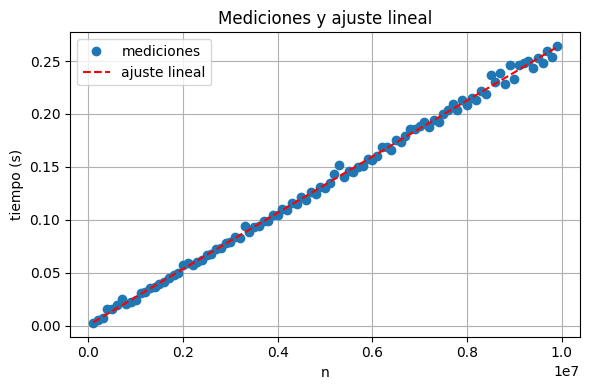

In [11]:
plt.figure(figsize=(6,4))
plt.plot(n_vals, tiempos, 'o', label='mediciones')
plt.plot(n_vals, T(n_vals), 'r--', label='ajuste lineal')
plt.xlabel('n')
plt.ylabel('tiempo (s)')
plt.title('Mediciones y ajuste lineal')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Usando el polinomio ajustado podemos estimar el tiempo para un $n$ muy grande; esto es útil para entender la escala del problema, pero hay que usarlo con cautela.

In [12]:
# Ejemplo de predicción (valor de salida en segundos)
pred = T(10000000000)
print(f'T(10_000_000_000) ≈ {pred:.3f} segundos')

T(10_000_000_000) ≈ 265.354 segundos


La predicción resultó en ~265.3 segundos, es decir, si ejecutamos el algoritmo para $n = 10^{10}$, obtendremos un tiempo estimado de 4.4 minutos (si vuelves a ejecutar, estos valores podrían cambiar), te invito a experimentar con este valor para corroborar esta predicción.

Recuerda que esto es una estimación basada en las mediciones realizadas en una máquina concreta y con el método de medición elegido.

### <font color='264CC7'> Ejemplo práctico</font>

Supón que deseas estimar el tiempo de ejecución para un tamaño de entrada $n = 10^6$.

- Realiza un gráfico que muestre la relación entre el tamaño de entrada $n$ y el tiempo de ejecución estimado y conjetura el posible orden de crecimiento.
- Supón que conoces que el algoritmo es de orden $O(n^2)$, realiza una interpolación polinómica para estimar el tiempo de ejecución.
- Estima el tiempo de ejecución para $n = 10^6$ utilizando el polinomio ajustado.

In [13]:
def doble_suma(n):
    s = 0
    for i in range(1, n+1):
        for j in range(1, i+1):
            s += i + j
    return s

Realicemos el gráfico:

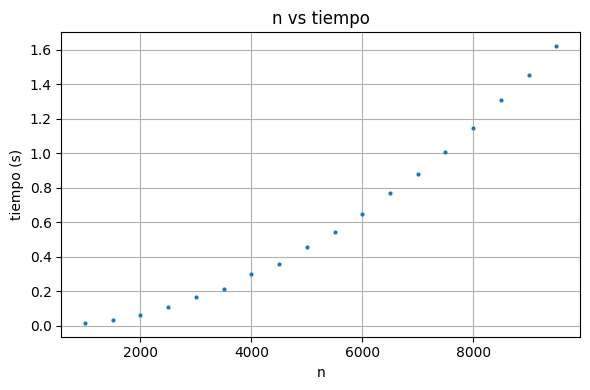

In [14]:
tiempos = []
n_vals = range(1000, 10000, 500)
for n in n_vals:
    t_inicial = time()
    doble_suma(n)
    t_final = time()
    tiempos.append(t_final - t_inicial)

plt.figure(figsize=(6,4))
plt.plot(n_vals, tiempos, 'o', markersize=2)
plt.xlabel('n')
plt.ylabel('tiempo (s)')
plt.title('n vs tiempo')
plt.grid(True)
plt.tight_layout()
plt.show()

Realicemos la interpolación polinómica para estimar el tiempo de ejecución.

Polinomio ajustado T(n)=ax^2+bx+c
           2
1.771e-08 x + 3.198e-06 x - 0.006881

Coeficientes (a, b, c): [ 1.77130664e-08  3.19790733e-06 -6.88075352e-03]


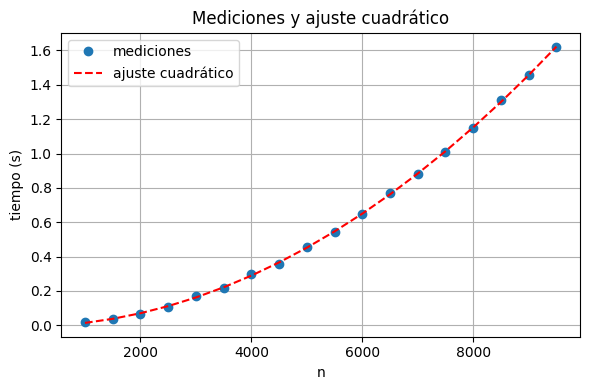

In [15]:
# Ajuste cuadrático (grado 2): tiempos ~ a*n^2 + b*n + c
z = np.polyfit(n_vals, tiempos, 2)
T = np.poly1d(z)

print('Polinomio ajustado T(n)=ax^2+bx+c')
print(T)
print('\nCoeficientes (a, b, c):', z)

plt.figure(figsize=(6,4))
plt.plot(n_vals, tiempos, 'o', label='mediciones')
plt.plot(n_vals, T(n_vals), 'r--', label='ajuste cuadrático')
plt.xlabel('n')
plt.ylabel('tiempo (s)')
plt.title('Mediciones y ajuste cuadrático')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Realicemos la predicción del tiempo de ejecución para el valor de $n = 10^6$.

In [16]:
pred = T(1000000)
print(f'T(1_000_000) ≈ {pred:.3f} segundos')

T(1_000_000) ≈ 17716.257 segundos


La predicción resultó en ~17716.2 segundos, es decir, si ejecutamos el algoritmo para $n = 10^6$, obtendremos un tiempo estimado de 4.9 horas (si vuelves a ejecutar, estos valores podrían cambiar).